# Synthetic Data Experiment

In [ ]:
from src.synthetic_data_runner import run_experiment
from src.clustering import KMeans, GaussianMixture

num_trials = 50

# Experiment 1:
num_sources_list = [3, 5, 10]
num_points = 1000
sigma = 1
delta_mu = 2
num_clusters = None

params_default = { 
    "num_clusters": num_clusters,
    "num_points": num_points,
    "sigma": sigma,
    "delta_mu": delta_mu,
    "num_trials": num_trials
}

run_experiment("vary_num_sources_kmeans", model_class=KMeans, param_to_vary="num_sources", param_values=num_sources_list, default_params=params_default)
run_experiment("vary_num_sources_mixed_gaussian", model_class=GaussianMixture, param_to_vary="num_sources", param_values=num_sources_list, default_params=params_default)


# Experiment 2:
num_points_list = [100, 1000, 5000]
num_sources = 5
sigma = 1
delta_mu = 2
num_clusters = None

params_default = { 
    "num_clusters": num_clusters,
    "num_sources": num_sources,
    "sigma": sigma,
    "delta_mu": delta_mu,
    "num_trials": num_trials
}

run_experiment("vary_num_points_kmeans", model_class=KMeans, param_to_vary="num_points", param_values=num_points_list, default_params=params_default)
run_experiment("vary_num_points_mixed_gaussian", model_class=GaussianMixture, param_to_vary="num_points", param_values=num_points_list, default_params=params_default)

# Experiment 3:
sigma_list = [1, 2, 3]
num_sources = 5
num_points = 1000
delta_mu = 2
num_clusters = None

params_default = { 
    "num_clusters": num_clusters,
    "num_sources": num_sources,
    "num_points": num_points,
    "delta_mu": delta_mu,
    "num_trials": num_trials
}

run_experiment("vary_sigma_kmeans", model_class=KMeans, param_to_vary="sigma", param_values=sigma_list, default_params=params_default)
run_experiment("vary_sigma_mixed_gaussian", model_class=GaussianMixture, param_to_vary="sigma", param_values=sigma_list, default_params=params_default)

# Experiment 4:
sigma_list = ["random"]
num_sources = 5
num_points = 1000
delta_mu = 2
num_clusters = None

params_default = { 
    "num_clusters": num_clusters,
    "num_sources": num_sources,
    "num_points": num_points,
    "delta_mu": delta_mu,
    "num_trials": num_trials
}

run_experiment("random_sigma_kmeans", model_class=KMeans, param_to_vary="sigma", param_values=sigma_list, default_params=params_default)
run_experiment("random_sigma_mixed_gaussian", model_class=GaussianMixture, param_to_vary="sigma", param_values=sigma_list, default_params=params_default)

# Experiment 5:
delta_mu_list = [0.5, 1, 2, 4]
num_sources = 3
num_points = 1000
sigma = 1
num_clusters = None

params_default = { 
    "num_clusters": num_clusters,
    "num_sources": num_sources,
    "num_points": num_points,
    "sigma": sigma,
    "num_trials": num_trials
}

run_experiment("vary_delta_mu_kmeans", model_class=KMeans, param_to_vary="delta_mu", param_values=delta_mu_list, default_params=params_default)
run_experiment("vary_delta_mu_mixed_gaussian", model_class=GaussianMixture, param_to_vary="delta_mu", param_values=delta_mu_list, default_params=params_default)

# Experiment 6:
num_clusters_list = [2, 3, 6, 8]
num_sources = 3
num_points = 1000
delta_mu = 2
sigma = 1

params_default = { 
    "sigma": sigma,
    "num_sources": num_sources,
    "num_points": num_points,
    "delta_mu": delta_mu,
    "num_trials": num_trials
}

run_experiment("vary_num_clusters_kmeans", model_class=KMeans, param_to_vary="num_clusters", param_values=num_clusters_list, default_params=params_default)
run_experiment("vary_num_clusters_mixed_gaussian", model_class=GaussianMixture, param_to_vary="num_clusters", param_values=num_clusters_list, default_params=params_default)

########################################################################################################################################################################################

print("All experiments done!")

All experiments done!


# Image Compression

In [3]:
from pathlib import Path
import os
from src.visualization import compress_image

images_path = Path("data/images")
os.makedirs(images_path, exist_ok=True)

for f in images_path.glob("*.jpeg"):
    compress_image(str(f), f"compressed_images/{str(f.stem)}")

# PCA Analysis

## 2D Projection

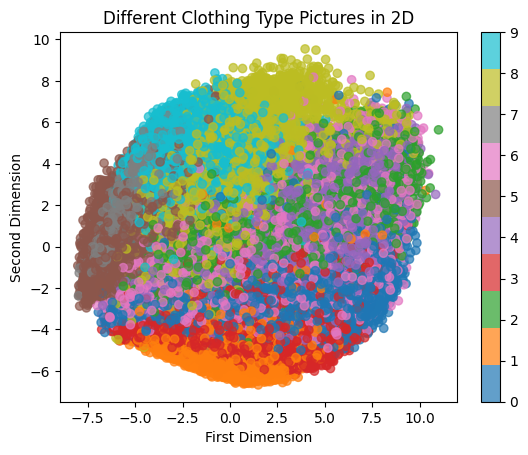

In [6]:
from src.pca_analysis import load_fashion_mnist, run_pca
import matplotlib.pyplot as plt
from pathlib import Path
import os

X, y = load_fashion_mnist()
X_transformed, pca_obj = run_pca(X=X, n_components=2)
x_values = X_transformed[:, 0]
y_values = X_transformed[:, 1]
plt.scatter(x_values, y_values, c=y.astype(int), cmap='tab10', alpha=0.7)
plt.title("Different Clothing Type Pictures in 2D")
plt.xlabel("First Dimension")
plt.ylabel("Second Dimension")
plt.colorbar()
save_path = Path("results/pca_analysis/2d_projection.png")
os.makedirs(save_path.parent, exist_ok=True)
plt.savefig(str(save_path))

## Dimension vs. Explained Variance

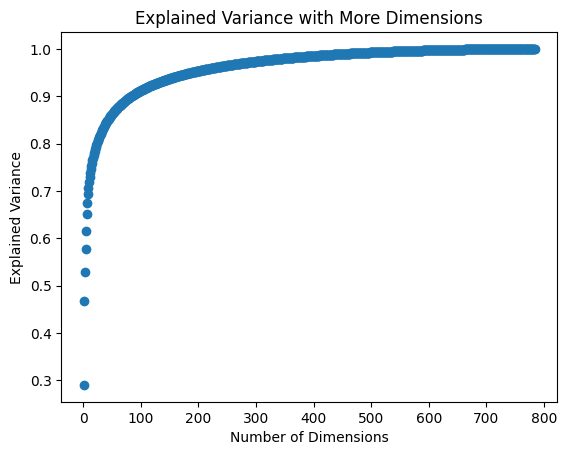

In [7]:
import numpy as np
from src.pca_analysis import load_fashion_mnist, run_pca
import matplotlib.pyplot as plt
from pathlib import Path
import os

# Number of components versus explained variance
X, y = load_fashion_mnist()
X_transformed, pca_obj = run_pca(X=X, n_components=784)
explained_variance = np.cumsum(pca_obj.explained_variance_ratio_)
plt.scatter(range(1,785), explained_variance)
plt.title("Explained Variance with More Dimensions")
plt.xlabel("Number of Dimensions")
plt.ylabel("Explained Variance")
save_path = Path("results/pca_analysis/variance_with_dimensions.png")
os.makedirs(save_path.parent, exist_ok=True)
plt.savefig(str(save_path))

# Public Figures

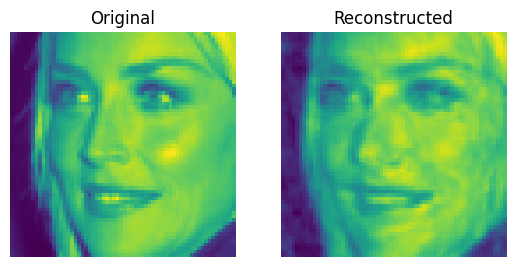

In [2]:
from src.pca_analysis import load_pubfig, PCA
from pathlib import Path
import matplotlib.pyplot as plt

images_path = Path("data/CelebDataProcessed")
limit = 500

pca = PCA(n_components=150, whiten=True) # whiten=True helps with images apparently...
X = load_pubfig(data_dir=images_path, limit=limit)
pca.fit(X=X)
first_ten = pca.components_[:10]
first_ten = first_ten.reshape(10, 64, 64)

fig, axes = plt.subplots(nrows=2, ncols=5)
for i, ax in enumerate(axes.flat): # axes.flat is necessary because axes is a 2D array
    image = first_ten[i]
    ax.imshow(image, cmap='bone')
    ax.axis('off') # no numbers on the axes when we are 
plt.savefig("results/pca_analysis/eigenfaces.png")
plt.close()

##########################################################################################
    
# Display constructed and reconstructed image
first_face = X[0].reshape((1, -1))
transformed_first_face = pca.transform(first_face)
reconstructed_first_face = pca.inverse_transform(transformed_first_face).reshape((64,64))
fig, axes = plt.subplots(nrows=1, ncols=2)

# Plot original face
axes[0].imshow(first_face.reshape(64, 64))
axes[0].set_title("Original")
axes[0].axis('off')

# Plot reconstructed face
axes[1].imshow(reconstructed_first_face)
axes[1].set_title("Reconstructed")
axes[1].axis('off')

plt.savefig("results/pca_analysis/reconstruction.png")

## Denoising

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from src.pca_analysis import load_fashion_mnist

X, y = load_fashion_mnist()
clean_images = X[:10]

noise_strength = 0.2
noise = noise_strength*np.random.normal(size=clean_images.shape)
noisy_images = np.clip(clean_images + noise, a_min=0, a_max=1)

pca = PCA(n_components=0.5) # As many dimensions as needed to describe that proportion of the variance
pca.fit(X) # Train on clean data

noisy_images_transformed = pca.transform(noisy_images)
noisy_images_reconstructed = pca.inverse_transform(noisy_images_transformed)

fig, axes = plt.subplots(nrows=3, ncols=10)
for i in range(10):
    # Show clean images
    axes[0][i].imshow(clean_images[i].reshape(28,28), cmap='gray')
    axes[0][i].axis('off')
    if i == 0:
        axes[0][i].set_title("Original")
    
    # Show noisy images
    axes[1][i].imshow(noisy_images[i].reshape(28,28), cmap='gray')
    axes[1][i].axis('off')
    if i == 0:
        axes[1][i].set_title("Noisy")
    
    # Show deconstructed noisy images
    axes[2][i].imshow(noisy_images_reconstructed[i].reshape(28,28), cmap='gray')
    axes[2][i].axis('off')
    if i == 0:
        axes[2][i].set_title("Reconstructed Noisy")

plt.savefig("results/pca_analysis/denoising.png")
plt.close()